# scale solution: replacements for any player

wrap the age-adjusted filter so that you can find replacements for any player.

## procedure
* determine the inputs
* determine the outputs
* import data
* generalize the position overlap function
* create a wrapper
* run demonstration for the worst players

### inputs
version 0.2
* club
* wage as a percentage of current player wage
* value as a percentage of current player value
* overall as a percentage of current player overall
* inverse rank, where 0 starts at the worst player

version 0.1
* club
* wage as a percentage of current player wage
* value as a percentage of current player value
* overall as a percentage of current player overall

### outputs
version 0.2
* current player
* list of replacement players 
* histogram of position overlap
* bar plot comparison of replacements to current player

version 0.1
* list of replacement players for worst player
* bar plot comparison of replacements to current player

### imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
players = pd.read_csv("data/full_filter_age_adjusted.csv",index_col='index')

/Users/nico/code/pydata-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### put it all together

In [47]:

# create a filter that calculates the overlap
# between current players best positions and all other players
def matchBestPositions(left,right):
    left = set(left)
    right = set(right)
    overlap = left.intersection(right)
    return len(overlap)/len(right)

def suggestReplacements(
    club = 'Real Madrid CF',
    wage = 0.5,
    value = 1.0,
    overall = 1.04,
    inverse_rank = 0 # 0 is your worst player
):

    # find player to replace
    club_players = players[players["Club"] == club]
    current_player = club_players.sort_values('Overall').iloc[inverse_rank]

    print('\nPlayer to be replaced\n')
    display(current_player[0:11])
    
    # compute the position overlap
    overlap_column = 'overlap_with_' + str(current_player['ID'])
    players[overlap_column] = players['best_positions']\
            .apply(matchBestPositions,args=(current_player['best_positions'],))

    # print histogram of position overlap
    players[overlap_column].hist(bins=50)

    # apply the replacement filter
    replacements = players[
        (players['age_adjusted_overall'] >= overall * current_player['age_adjusted_overall']) &
        (players["Value"] >= value * current_player["Value"]) &
        (players["Wage"]  < wage * current_player["Wage"]) &
        (players["Club"] != club) &
        (players[overlap_column] >= .67)
    ]
    # print replacement data frame
    print('\nReplacement players\n')
    display(replacements)

    # create bar plot comparison
    comparison = replacements.append(current_player)
    columns = ['Overall','age_adjusted_overall','Potential','Value','Wage','Age','Name']
    ax = comparison[columns]\
        .plot(x='Name',kind='bar',subplots=True,legend=False,figsize=(15,3),layout=(1,6))

    for index,subplot in enumerate(ax[0]):
        current_player_value = current_player[columns[index]]
        subplot.axhline(current_player_value, ls='--', color='black')
        subplot.set_xlabel('')
        subplot.patches[-1].set_facecolor('#aa3333')

### demo


Player to be replaced



Name                                                 L. Zidane
Age                                                         19
Photo          https://cdn.sofifa.org/48/18/players/240311.png
Nationality                                             France
Flag                       https://cdn.sofifa.org/flags/18.png
Overall                                                     64
Potential                                                   73
Club                                            Real Madrid CF
Club Logo           https://cdn.sofifa.org/24/18/teams/243.png
Value                                                   500000
Wage                                                     10000
Name: 11632, dtype: object


Replacement players



,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RS,RW,RWB,ST,best_position_rating,best_positions,preferred_positions,overlap_with_240311,age_adjusted_overall,overlap_with_165153
index,,,,,,,,,,,,,,,,,,,,,
680,A. Pyatov,33,https://cdn.sofifa.org/48/18/players/142902.png,Ukraine,https://cdn.sofifa.org/flags/49.png,79,79,Shakhtar Donetsk,https://cdn.sofifa.org/24/18/teams/101059.png,6500000.0,...,NaN,NaN,NaN,NaN,NaN,['GK'],['GK'],1.0,76.928620,0.25
985,S. Kapino,23,https://cdn.sofifa.org/48/18/players/205878.png,Greece,https://cdn.sofifa.org/flags/22.png,77,83,Olympiakos CFP,https://cdn.sofifa.org/24/18/teams/280.png,9000000.0,...,NaN,NaN,NaN,NaN,NaN,['GK'],['GK'],1.0,79.231715,0.25
7865,J. Bijlow,19,https://cdn.sofifa.org/48/18/players/232229.png,Netherlands,https://cdn.sofifa.org/flags/34.png,67,80,Feyenoord,https://cdn.sofifa.org/24/18/teams/246.png,1100000.0,...,NaN,NaN,NaN,NaN,NaN,['GK'],['GK'],1.0,76.656771,0.25
10016,P. Dahlberg,18,https://cdn.sofifa.org/48/18/players/233763.png,Sweden,https://cdn.sofifa.org/flags/46.png,65,78,IFK Göteborg,https://cdn.sofifa.org/24/18/teams/319.png,775000.0,...,NaN,NaN,NaN,NaN,NaN,['GK'],['GK'],1.0,77.192029,0.25
12715,M. Svilar,17,https://cdn.sofifa.org/48/18/players/230872.png,Belgium,https://cdn.sofifa.org/flags/7.png,63,83,SL Benfica,https://cdn.sofifa.org/24/18/teams/234.png,600000.0,...,NaN,NaN,NaN,NaN,NaN,['GK'],['GK'],1.0,76.336718,0.25


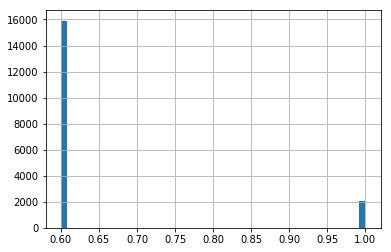

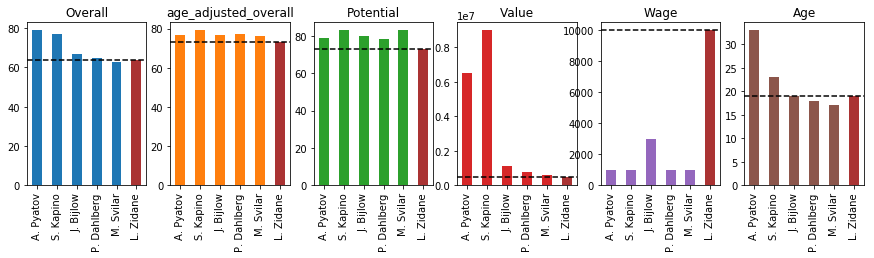

In [48]:
suggestReplacements()


Player to be replaced



Name                                             Álvaro Tejero
Age                                                         20
Photo          https://cdn.sofifa.org/48/18/players/231856.png
Nationality                                              Spain
Flag                       https://cdn.sofifa.org/flags/45.png
Overall                                                     66
Potential                                                   78
Club                                            Real Madrid CF
Club Logo           https://cdn.sofifa.org/24/18/teams/243.png
Value                                                    1e+06
Wage                                                     22000
Name: 9514, dtype: object


Replacement players



,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RW,RWB,ST,best_position_rating,best_positions,preferred_positions,overlap_with_240311,age_adjusted_overall,overlap_with_165153,overlap_with_231856
index,,,,,,,,,,,,,,,,,,,,,
696,K. Dolberg,19,https://cdn.sofifa.org/48/18/players/228687.png,Denmark,https://cdn.sofifa.org/flags/13.png,78,88,Ajax,https://cdn.sofifa.org/24/18/teams/245.png,16500000.0,...,72.0,50.0,77.0,77.0,"['CF', 'LF', 'LS', 'RF', 'RS', 'ST']","['CAM', 'ST']",0.6,89.242211,0.916667,0.777778
1555,M. de Ligt,17,https://cdn.sofifa.org/48/18/players/235243.png,Netherlands,https://cdn.sofifa.org/flags/34.png,76,89,Ajax,https://cdn.sofifa.org/24/18/teams/245.png,11500000.0,...,61.0,69.0,64.0,75.0,"['CB', 'LCB', 'RCB']",['CB'],0.6,92.088739,0.666667,0.888889
2950,J. Kluivert,18,https://cdn.sofifa.org/48/18/players/236920.png,Netherlands,https://cdn.sofifa.org/flags/34.png,73,86,Ajax,https://cdn.sofifa.org/24/18/teams/245.png,7000000.0,...,73.0,59.0,67.0,73.0,"['LM', 'LW', 'RM', 'RW']","['LW', 'RW']",0.6,86.692586,0.666667,0.888889
3943,E. Barco,18,https://cdn.sofifa.org/48/18/players/236007.png,Argentina,https://cdn.sofifa.org/flags/52.png,72,90,Independiente,https://cdn.sofifa.org/24/18/teams/110093.png,6500000.0,...,72.0,57.0,65.0,72.0,"['CAM', 'CF', 'LAM', 'LF', 'LM', 'LW', 'RAM', ...","['CM', 'LM']",0.6,85.505016,0.833333,0.888889


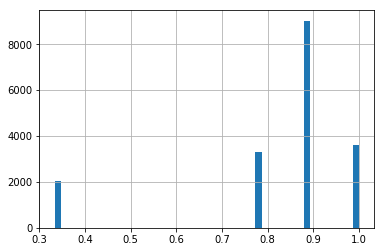

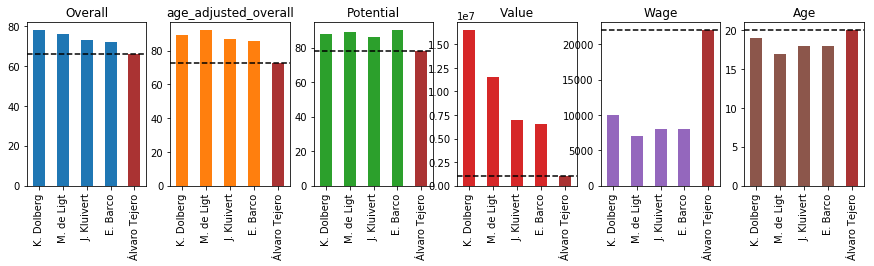

In [53]:
suggestReplacements(overall=1.17,inverse_rank=1)


Player to be replaced



Name                                                     Óscar
Age                                                         19
Photo          https://cdn.sofifa.org/48/18/players/239335.png
Nationality                                              Spain
Flag                       https://cdn.sofifa.org/flags/45.png
Overall                                                     68
Potential                                                   81
Club                                            Real Madrid CF
Club Logo           https://cdn.sofifa.org/24/18/teams/243.png
Value                                                  1.7e+06
Wage                                                     37000
Name: 7604, dtype: object


Replacement players



,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RWB,ST,best_position_rating,best_positions,preferred_positions,overlap_with_240311,age_adjusted_overall,overlap_with_165153,overlap_with_231856,overlap_with_239335
index,,,,,,,,,,,,,,,,,,,,,
405,Grimaldo,21,https://cdn.sofifa.org/48/18/players/210035.png,Spain,https://cdn.sofifa.org/flags/45.png,80,87,SL Benfica,https://cdn.sofifa.org/24/18/teams/234.png,17500000.0,...,80.0,70.0,80.0,"['LB', 'LWB', 'RB', 'RWB']",['LB'],0.6,85.842288,0.666667,1.000000,0.7
696,K. Dolberg,19,https://cdn.sofifa.org/48/18/players/228687.png,Denmark,https://cdn.sofifa.org/flags/13.png,78,88,Ajax,https://cdn.sofifa.org/24/18/teams/245.png,16500000.0,...,50.0,77.0,77.0,"['CF', 'LF', 'LS', 'RF', 'RS', 'ST']","['CAM', 'ST']",0.6,89.242211,0.916667,0.777778,0.8
1555,M. de Ligt,17,https://cdn.sofifa.org/48/18/players/235243.png,Netherlands,https://cdn.sofifa.org/flags/34.png,76,89,Ajax,https://cdn.sofifa.org/24/18/teams/245.png,11500000.0,...,69.0,64.0,75.0,"['CB', 'LCB', 'RCB']",['CB'],0.6,92.088739,0.666667,0.888889,0.8
1927,M. Sarr,18,https://cdn.sofifa.org/48/18/players/235454.png,France,https://cdn.sofifa.org/flags/18.png,75,88,OGC Nice,https://cdn.sofifa.org/24/18/teams/72.png,10500000.0,...,72.0,61.0,74.0,"['CB', 'LB', 'LCB', 'RB', 'RCB']","['LB', 'CB']",0.6,89.067725,0.666667,0.888889,0.8
2950,J. Kluivert,18,https://cdn.sofifa.org/48/18/players/236920.png,Netherlands,https://cdn.sofifa.org/flags/34.png,73,86,Ajax,https://cdn.sofifa.org/24/18/teams/245.png,7000000.0,...,59.0,67.0,73.0,"['LM', 'LW', 'RM', 'RW']","['LW', 'RW']",0.6,86.692586,0.666667,0.888889,0.8


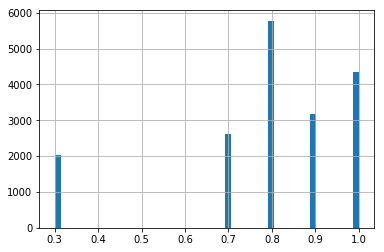

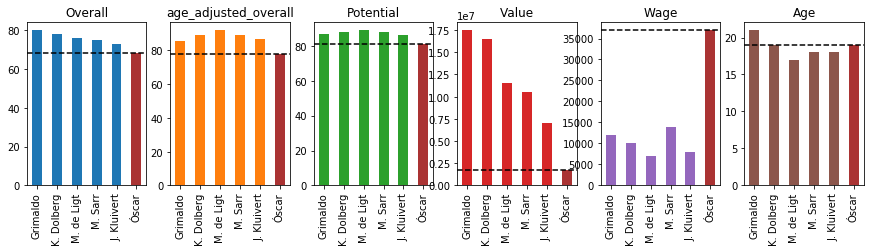

In [56]:
suggestReplacements(overall=1.1,inverse_rank=2)